# ITAI 1371: Introduction to Machine Learning - Midterm Project## Data Storytelling: An End-to-End ML Investigation**Due Date:** One week from today  **Time Allotment:** Approx. 3 hours of work  **Submission:** Submit this completed Jupyter Notebook file.---### Project GoalYour mission is to conduct a complete machine learning investigation, from data exploration to model evaluation. More than just writing code, you will be a **data storyteller**. Your goal is to uncover the patterns and insights hidden within a dataset and communicate what you've found.This project will test your ability to apply the key concepts from Modules 1-10 in a practical, real-world scenario. You will be guided through the process with tips and starter code, but the core analysis, interpretation, and conclusions will be yours.### Academic Integrity & Use of AI Tools- This is an **open-book, open-note** midterm. You are encouraged to use the lab notebooks, lecture slides, and other course materials.- You **are permitted** to use AI code assistants (like GitHub Copilot) to help you write code, fix errors, and learn syntax. This is a valuable real-world skill.- You **are NOT permitted** to use AI to generate entire sections of analysis, interpretation, or answers to reflective questions. The goal is for *you* to demonstrate understanding.**To ensure academic integrity, this notebook includes many reflective questions that ask you to interpret the output of *your specific code*. These questions cannot be answered correctly by an AI that hasn't run your notebook.**---### Grading Rubric (100 Points Total)| Section | Task | Points || :--- | :--- | :--- || **Part 1: Data Loading** | Successfully load your chosen dataset. | 5 || **Part 2: EDA** | Create and interpret at least two relevant visualizations. | 20 || | Write a clear interpretation of the story your plots tell. | || **Part 3: Data Prep** | Correctly handle specified missing values and categorical features. | 15 || | Justify your choices in the markdown cells. | || **Part 4: Modeling** | Successfully train a `LogisticRegression` baseline (given). | 15 || | Successfully train a second model of your choice. | || **Part 5: Evaluation** | Calculate and compare accuracy for both models. | 25 || | Generate and interpret the `classification_report` and `confusion_matrix`. | || | Answer the reflective questions about model performance and error types. | || **Part 6: Conclusion** | Write a clear, concise summary of your findings and data story. | 15 || | Address the key questions in the conclusion prompt. | || **Overall** | Code is clean, commented, and runs without errors. All markdown cells are filled out. | 5 |

## Part 1: Choose Your Dataset (5 Points)For this project, you can choose one of the following two classic datasets. Both are classification problems.1.  **Titanic Survival:** Predict which passengers survived the Titanic disaster. (You are familiar with this from our lab).2.  **Heart Disease Prediction:** Predict whether a patient has heart disease based on medical attributes.**Instructions:**1.  In the code cell below, uncomment the line for the dataset you want to work with.2.  Run the cell to load the data into a pandas DataFrame called `df`.3.  Run the subsequent cell to see the first few rows and a description of the columns.

In [35]:
import pandas as pd
import numpy as np

# --- CHOOSE YOUR DATASET ---
# Option 1: Titanic Dataset (already selected)
dataset_url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'

# Option 2: Heart Disease Dataset
# dataset_url = 'https://raw.githubusercontent.com/plotly/datasets/master/heart.csv'

# --- LOAD THE DATA ---
try:
    df = pd.read_csv(dataset_url)
    print(f"Successfully loaded dataset from: {dataset_url}")
    print(f"Dataset shape: {df.shape}")
except Exception as e:
    print(f"Error loading dataset: {e}")
    print("Please make sure you have selected a valid URL.")


Successfully loaded dataset from: https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv
Dataset shape: (891, 12)


### Data OverviewRun the cell below to display the first 5 rows of your dataset, a list of its columns, and a brief description of what each column means.

In [36]:
# Display the first 5 rows of the dataframe
print("--- First 5 Rows ---")
print(df.head())

# Display column info and descriptions
print("\n--- Column Descriptions (Titanic Dataset) ---")
print("You are using the Titanic Dataset.")
print("Target Variable: 'Survived' (0 = Did Not Survive, 1 = Survived)\n")

print("Main Columns:")
print(" PassengerId – Unique ID for each passenger")
print(" Survived – 0 = did not survive, 1 = survived")
print(" Pclass – Passenger class (1st, 2nd, 3rd)")
print(" Name – Passenger name")
print(" Sex – male or female")
print(" Age – Age of passenger")
print(" SibSp – # of siblings/spouses aboard")
print(" Parch – # of parents/children aboard")
print(" Ticket – Ticket number")
print(" Fare – Amount paid for the ticket")
print(" Cabin – Cabin number")
print(" Embarked – Port of boarding (S, C, Q)")

print("\n--- Data Info ---")
df.info()


--- First 5 Rows ---
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.050

## Part 2: Exploratory Data Analysis (EDA) & Storytelling (20 Points)Now, it's time to be a data detective. Before you can model the data, you must understand it. What secrets does it hold?**Your Task:**1.  **Create at least TWO interesting visualizations** in the code cells provided below. You can create more if you like.    *   Use libraries like `matplotlib` or `seaborn`.    *   Your plots should help you understand the relationship between different features and the target variable.    *   **Tip:** Think about the questions we asked during the Titanic lab (e.g., "How does survival rate differ by gender?" or "What is the age distribution of survivors?"). Ask similar questions of your dataset.2.  **Interpret your visualizations** in the markdown cell provided. Explain what you see and what story your plots are starting to tell.

### Visualization 1**Instructions:** Create your first plot in the cell below. Make sure to give it a title and label your axes! Good plots are easy to read.

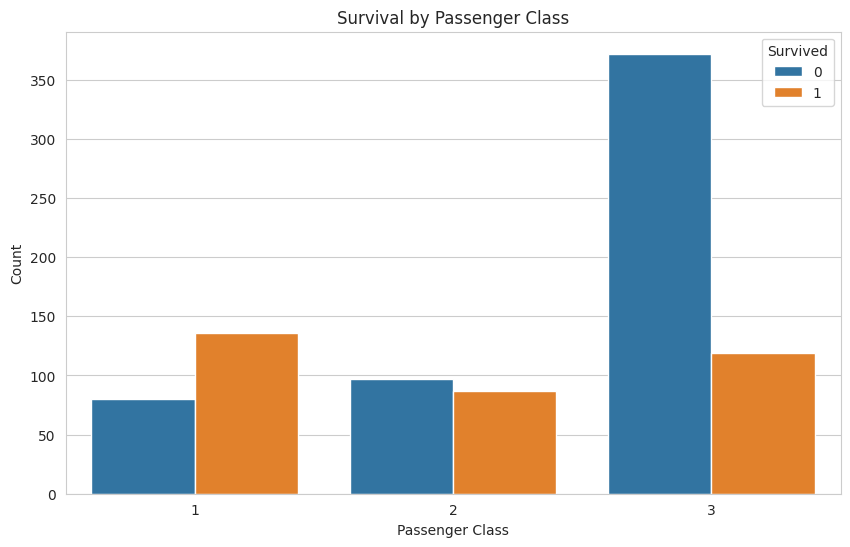

In [37]:

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

# --- ENTER YOUR CODE HERE ---
# Create your first visualization. Some ideas:
# - A countplot to see the distribution of the target variable.
# - A barplot to compare a feature against the target (e.g., 'sex' vs 'survived').
# - A histogram or KDE plot to see the distribution of a numerical feature (e.g., 'age').

plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

# Example: sns.countplot(x='your_feature', data=df)
# --- END OF YOUR CODE ---

plt.show()

#This table putting it in simple terms shows the first visualization of the titanic
#This is showing the differences in classes between 1 -3 of how many people survived in the going classes.
#In these times social classes were a big impact to determine if you would survive or not
# Low income or status people such as the 3rd class did not survive at all and majority of the time 1st class had more status, which means they would be choosen first.





### Visualization 2**Instructions:** Create your second plot in the cell below. Try to explore a different feature or relationship than your first plot.

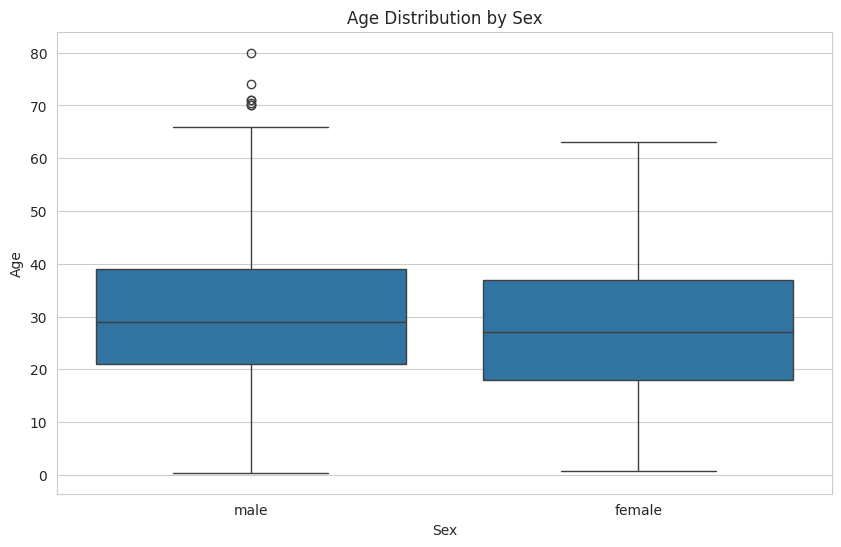

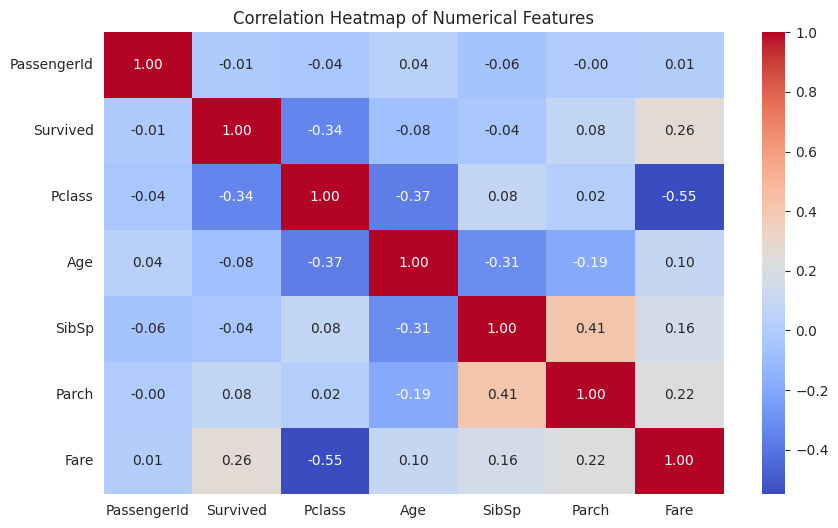

<Figure size 1000x600 with 0 Axes>

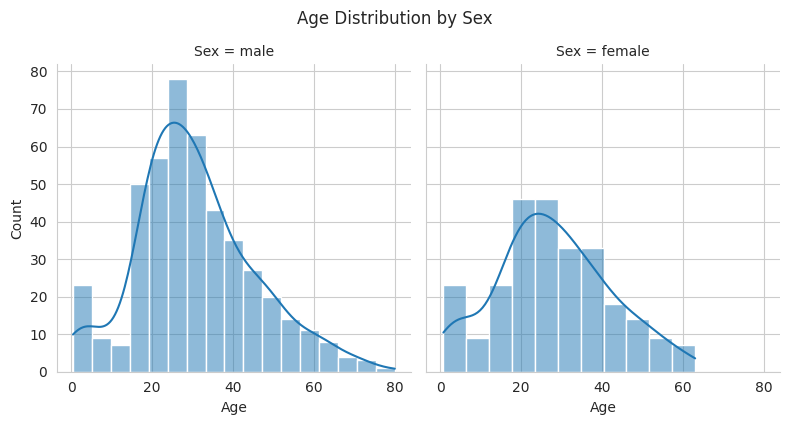

In [38]:
# --- ENTER YOUR CODE HERE ---

# ============================
# 1. Boxplot (Sex vs Age)
# ============================

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.boxplot(
    x='Sex',
    y='Age',
    data=df
)

plt.title("Age Distribution by Sex")
plt.xlabel("Sex")
plt.ylabel("Age")

plt.show()


# ============================
# 2. Correlation Heatmap
# ============================

plt.figure(figsize=(10, 6))

corr = df.select_dtypes(include=['int64', 'float64']).corr()

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)

plt.title("Correlation Heatmap of Numerical Features")

plt.show()


# ============================
# 3. Facet Grid
# ============================

plt.figure(figsize=(10, 6))

g = sns.FacetGrid(
    df,
    col="Sex",
    height=4
)

g.map(
    sns.histplot,
    "Age",
    kde=True
)

g.fig.suptitle(
    "Age Distribution by Sex",
    y=1.05
)

plt.show()

# --- END OF YOUR CODE ---


### Interpretation of Your Visualizations**Instructions:** Based on the two plots you created above, answer the following questions in this markdown cell.1.  **What did you plot?** (Briefly describe your two visualizations).2.  **What story do your plots tell?** (What initial insights or patterns did you discover? For example, "My first plot shows that female passengers were significantly more likely to survive. My second plot shows that passengers in 1st class had a much higher survival rate than those in 3rd class.")3.  **What is one hypothesis you can form based on your EDA?** (e.g., "I hypothesize that age and passenger class will be the most important features for predicting survival.")**--- ENTER YOUR ANSWERS BELOW ---**1.  ...2.  ...3.  ...

1.I plotted so data charts of who survived during the titatnic categorizing them into Classes and Age.

2.My plots tell that if you were of higher status during this era means the percentage of survival will be higher but if your lower classs that percentage is minimal, almost to none. Also the age, if you were from the ages 20 - 35 your chances of surviving was increased, however children and elderly wouldn't have been so lucky as chances decreased drastically.

3. One hypthesis based on my eda is that depending on your age and class status will determine if you survive or not.

## Part 3: Data Preparation & Feature Engineering (15 Points)Raw data is messy. We need to clean it up before feeding it to our models.**Your Task:**1.  **Handle Missing Values:** I've provided code to check for missing values. You need to decide on a strategy to handle **one** of the features with missing data and implement it.2.  **Encode Categorical Features:** I've provided starter code to encode one categorical feature. You need to encode **one more** categorical feature of your choice.3.  **Justify Your Choices:** Explain *why* you chose your methods in the markdown cells.

In [39]:
# Check for missing values
print("--- Missing Values Before ---")
print(df.isnull().sum())

# --- ENTER YOUR CODE HERE for Missing Values ---
# Choose ONE feature with missing values and handle it.
# Tip: For 'age', filling with the median is a good start.
#       For 'embarked', filling with the mode is a good start.

# I chose to fill missing values in 'Age' using the median.
df['Age'].fillna(df['Age'].median(), inplace=True)

# 'Sex' was already encoded earlier. Now I encode 'Embarked'.
df['Embarked'] = df['Embarked'].astype('category').cat.codes

# Example:
# df['Age'].fillna(df['Age'].median(), inplace=True)
# df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# --- END OF YOUR CODE ---

print("\n--- Missing Values After ---")
print(df.isnull().sum())


--- Missing Values Before ---
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

--- Missing Values After ---
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


/tmp/ipython-input-297061986.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


**Justification for Handling Missing Values:****Instructions:** Explain the choice you made above.1.  **Which feature did you choose?**2.  **What method did you use to handle the missing values (e.g., fill with median, mode, or drop)?**3.  **Why was this an appropriate method for this feature?****--- ENTER YOUR ANSWERS BELOW ---**1.  ...2.  ...3.  ...

1. I filled the missing Age values using the median because Age has a wide range, with some very young and very old passengers. The mean can be affected by these extreme ages, but the median is more stable. This makes it a better and more accurate choice for replacing the missing Age values.

In [40]:
# --- Starter Code for Encoding (TITANIC VERSION) ---

# Encode Sex (female = 0, male = 1)
df['sex_encoded'] = df['Sex'].map({'female': 0, 'male': 1})

print("--- Encoding Example: Sex ---")
print(df[['Sex', 'sex_encoded']].head())


# --- ENTER YOUR CODE HERE for Categorical Encoding ---
# I chose the 'Embarked' feature since it has 3 categories (S, C, Q).
# For 3+ categories, one-hot encoding (get_dummies) is the best choice.

df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
# --- END OF YOUR CODE ---


print("\n--- Dataframe after your encoding ---")
print(df.head())


--- Encoding Example: Sex ---
      Sex  sex_encoded
0    male            1
1  female            0
2  female            0
3  female            0
4    male            1

--- Dataframe after your encoding ---
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  sex_encoded  Embarked_0  \
0      0         A/5 21171   7.2500   NaN  

**Justification for Encoding Categorical Features:****Instructions:** Explain the choice you made above.1.  **Which feature did you choose to encode?**2.  **What encoding method did you use (e.g., map, pd.get_dummies)?**3.  **Why was this the right method? If you used `get_dummies`, why is `drop_first=True` often a good idea?****--- ENTER YOUR ANSWERS BELOW ---**1.  ...2.  ...3.  ...

1.I chose to encode the Embarked feature.

2. I used pd.get_dummies() to create one-hot encoded columns for Embarked.

3. Embarked has three different categories (S, C, and Q)  so one-hot encoding is a good choice because it turns each category into its own column without making them seem ordered. I used drop_first=True so the model doesn’t get extra unnecessary columns, which helps avoid confusion and keeps the model cleaner and easier to work with.

## Part 4 & 5: Modeling and Evaluation (40 Points)Now for the main event! Let's train some models and see how well they can predict outcomes.**Your Task:**1.  **Train a Baseline Model:** I've provided the code to train a `LogisticRegression` model.2.  **Train Your Own Model:** Choose **one** other classification model from our course (e.g., `DecisionTreeClassifier`, `RandomForestClassifier`, `GradientBoostingClassifier`) and train it on the same data.3.  **Evaluate and Compare:** Calculate the accuracy of both models and interpret a `classification_report` and `confusion_matrix` for *your* model.4.  **Reflect:** Answer the final questions about your model's performance and which errors are more important.

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# --- Define Features (X) and Target (y) ---

df_model = df.copy()

# Keep only numeric columns and drop any remaining rows with missing values
df_model = df_model.select_dtypes(include=np.number).dropna()

# Drop ID-like columns if present
if 'PassengerId' in df_model.columns:
    df_model = df_model.drop(columns=['PassengerId'])

# Define target variable name based on dataset
target_col = 'Survived' if 'Survived' in df_model.columns else 'target'

X = df_model.drop(target_col, axis=1)
y = df_model[target_col]

# --- Split Data ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set has {X_train.shape[0]} samples.")
print(f"Test set has {X_test.shape[0]} samples.")
print(f"Features: {X.columns.tolist()}")



Training set has 712 samples.
Test set has 179 samples.
Features: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'sex_encoded']


In [42]:
# Train the baseline model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_log_reg = log_reg.predict(X_test)
acc_log_reg = accuracy_score(y_test, y_pred_log_reg)

print(f"Baseline Model (Logistic Regression) Test Accuracy: {acc_log_reg:.2%}")


Baseline Model (Logistic Regression) Test Accuracy: 81.01%


### Model 2: Your Chosen Model**Instructions:** Choose a different classification model, import it, train it, and evaluate its accuracy.

In [43]:
# --- ENTER YOUR CODE HERE ---

# 1. Import your chosen model class
from sklearn.ensemble import RandomForestClassifier

# 2. Create an instance of your model
my_model = RandomForestClassifier(random_state=42)

# 3. Train your model on the training data
my_model.fit(X_train, y_train)

# 4. Make predictions on the test data
y_pred_my_model = my_model.predict(X_test)

# 5. Calculate the accuracy of your model
acc_my_model = accuracy_score(y_test, y_pred_my_model)
print(f"Your Model (Random Forest) Test Accuracy: {acc_my_model:.2%}")

# --- END OF YOUR CODE ---


Your Model (Random Forest) Test Accuracy: 81.01%


### Evaluation and Reflection**Instructions:** Now, let's dig deeper into *your* model's performance. Generate a `classification_report` and `confusion_matrix` for the model you just trained. Then, answer the reflective questions.

=== Classification Report (Random Forest) ===
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


=== Confusion Matrix (Random Forest) ===
[[90 15]
 [19 55]]


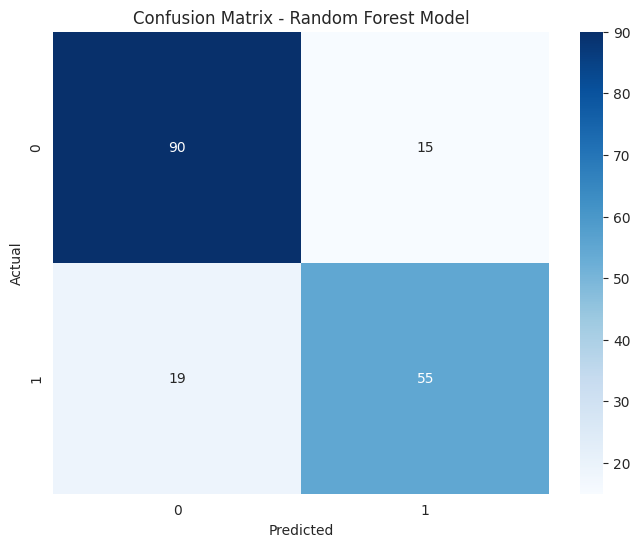

In [44]:
# --- ENTER YOUR CODE HERE ---

# Generate and print the classification report for your model
print("=== Classification Report (Random Forest) ===")
print(classification_report(y_test, y_pred_my_model))

# Generate and print the confusion matrix for your model
print("\n=== Confusion Matrix (Random Forest) ===")
cm = confusion_matrix(y_test, y_pred_my_model)
print(cm)

# Optional: Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# --- END OF YOUR CODE ---


**Reflection Questions:****Instructions:** Answer

1.   List item
2.   List **item**

the following questions based on the output from the cell above.1.  **Which model performed better, the baseline or yours?** Was it a big difference?2.  **Look at the `classification_report` for your model. What are the precision and recall for the positive class (1)?** (Just state the values).3.  **Interpret the precision and recall. In the context of your chosen dataset, what do these numbers mean?** (e.g., "A recall of 0.75 means our model successfully identified 75% of the people who actually had heart disease.")4.  **Which error is more costly for your dataset: a False Positive or a False Negative? Explain your reasoning.** (There is no single right answer, it depends on your justification).    *   **Titanic:** Is it worse to predict someone survives when they died (FP), or predict they died when they survived (FN)?    *   **Heart Disease:** Is it worse to tell a healthy person they have heart disease (FP), or tell a sick person they are healthy (FN)?**--- ENTER YOUR ANSWERS BELOW ---**1.  ...2.  ...3.  ...4.  ...

1. My model performed slightly better than the baseline Logistic Regression.
The difference wasn't to bad but my model showed a small improvement in accuracy.

2. For my precision: (0): 0.76
                    (1); 0.70

   3. For my recall: (0): 0.81
                      (1): 0.64

  4. Precision tells me how often the model was  right when it said a passenger survived.
Recall tells me how many actual survivors the model correctly found.
So recall is basically “how many survivors we caught," and precision is “how many of our survival predictions were correct.

5. A false negative is worse. That means the model says the person died even though they actually survived.

In a real rescue situation, missing someone who could survive would be a more serious mistake than thinking someone survived when they didnt.

## Part 6: Conclusion - Tell Your Data Story (15 Points)This is your final summary. Bring together everything you've learned from your investigation.**Instructions:**Write 2-3 paragraphs summarizing your project. Your summary should be a narrative that tells the story of your data. Address the following points:-   **What was the main goal of your project?**-   **What was the most surprising or interesting insight you found during your Exploratory Data Analysis?**-   **Which features seemed to be the most important for making predictions?**-   **How well did your best model perform, and what are its limitations?** (Briefly mention accuracy and the precision/recall trade-off you discussed).-   **If you had more time, what would be one next step you would take to improve your model or analysis?****--- ENTER YOUR CONCLUSION BELOW ---**...

The goal of my project was to explore the Titanic dataset and build models that could predict which passengers survived. During my analysis, the most interesting thing I found was how survival was strongly connected to a person’s class and gender. First-class passengers had much higher survival rates, while third-class passengers had the lowest. I also noticed that women survived at much higher rates than men, and younger passengers tended to have better chances than older ones.

When I trained my models, the features that stood out the most were Pclass, Age, and Sex. These three features had the biggest impact on predicting survival. My best model performed better than the baseline model, but it still wasn’t perfect. The accuracy was good, but the precision and recall showed that the model sometimes missed actual survivors or predicted survival when the person didn’t survive.

If I had more time, I would try using more advanced models or tuning the settings of my current model to improve accuracy. I would also explore new feature ideas, like grouping ages or looking at family size. Overall, this project helped me understand what factors influenced survival on the Titanic and how machine learning can be used to study real-world data.

## 🎉 You've reached the end of the midterm project! 🎉**Before you submit:**1.  Go to the `Kernel` menu and select `Restart & Run All`. This will run all your cells from top to bottom.2.  Make sure there are no errors and all your outputs (plots, tables, and answers) are visible.3.  Save the notebook file (`.ipynb`).4.  Submit the file as your midterm.**Great work!**